In [1]:
print('hello')

hello


In [2]:
import os
import tarfile
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("./datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        print(housing_url)
        os.mkdir(housing_url)
    tgz_path = os.path.join(housing_path,"housing.tag")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.iloc[289:294]



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
289,-122.17,37.78,52.0,653.0,128.0,296.0,121.0,4.1750,144000.0,NEAR BAY
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
291,-122.16,37.77,48.0,977.0,194.0,446.0,180.0,4.7708,156300.0,NEAR BAY
292,-122.16,37.77,45.0,2324.0,397.0,968.0,384.0,3.5739,176000.0,NEAR BAY
293,-122.16,37.77,39.0,1583.0,349.0,857.0,316.0,3.0958,145800.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


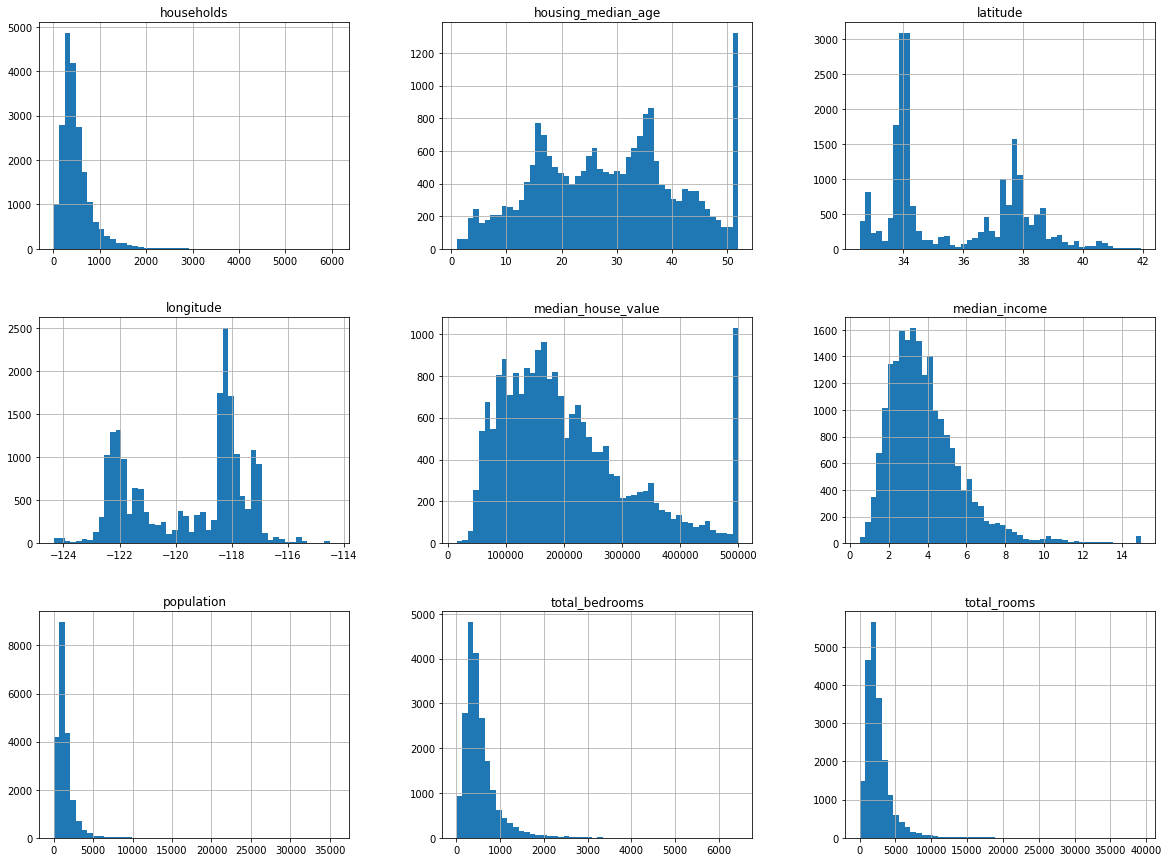

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [11]:
import numpy as np
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
    

In [9]:
#correlations
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112d6b1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116fcc908>]], dtype=object)

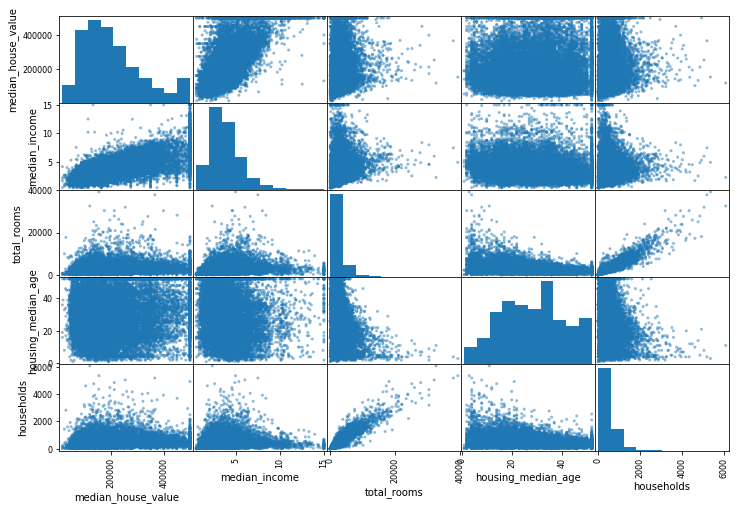

In [38]:
from pandas.plotting import scatter_matrix
attributes =["median_house_value",'median_income',"total_rooms","housing_median_age","households"]
scatter_matrix(housing[attributes],figsize=(12,8))

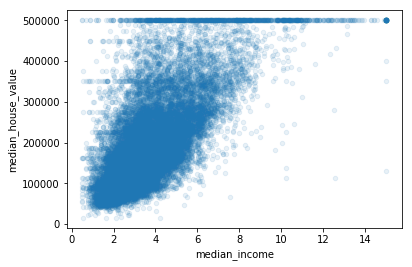

In [10]:
#now we know median_income is the most import attribute to median_house_value, let us draw a scatterplot

%matplotlib inline
import matplotlib.pyplot as plt
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha='0.1')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
trainset,testset = train_test_split(housing,test_size=0.2,random_state=42)
print(len(trainset),len(testset))

16512 4128


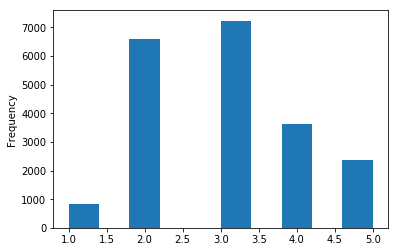

In [12]:
import numpy as np
import matplotlib.pyplot as plt
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)
housing["income_cat"].plot(kind="hist")
plt.show()



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strate_train_set = housing.loc[train_index]
    strate_test_set = housing.loc[test_index]


In [15]:
housing["income_cat"].value_counts()/len(housing)


3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [16]:
strate_train_set["income_cat"].value_counts()/len(strate_train_set)


3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [17]:
#handle text
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoding_ocean_proximity = encoder.fit_transform(housing['ocean_proximity'])
print(encoding_ocean_proximity) #like an enum,not the best, because ML algorithms may assuem two nearby values are more
#similiar than two distant values

#using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoding_ocean_proximity = encoder.fit_transform(encoding_ocean_proximity.reshape(-1,1))
encoding_ocean_proximity.toarray()


[3 3 3 ..., 1 1 1]


array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [18]:
#imputer
from sklearn.preprocessing import Imputer
from pandas import DataFrame
imputer  = Imputer(strategy="median") #could be mean,median,most_frequent
housing_num = housing.drop('ocean_proximity',axis=1) #can't support text 
housing_num_array =imputer.fit_transform(housing_num)
housing_num = DataFrame(housing_num_array,columns=housing_num.columns)
housing_num.iloc[289:294]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
289,-122.17,37.78,52.0,653.0,128.0,296.0,121.0,4.1750,144000.0,3.0
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,3.0
291,-122.16,37.77,48.0,977.0,194.0,446.0,180.0,4.7708,156300.0,4.0
292,-122.16,37.77,45.0,2324.0,397.0,968.0,384.0,3.5739,176000.0,3.0
293,-122.16,37.77,39.0,1583.0,349.0,857.0,316.0,3.0958,145800.0,3.0


In [19]:
#Feature Scaling
#Min-ax => MinMaxScaler
#Standrdization =>StandardScaler

#try minmax first
import numpy as np
from pandas import Series
s = Series([2.,10.,6.,7.,9.,10.,2.])
# min is 2, and max is 10, then x-min/max-min
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
s1 = m.fit_transform(s.values.reshape(-1,1))


#try standardScaler,
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
s2 = st.fit_transform(s.values.reshape(-1,1))
print('s1',s1)
print('s2',s2)


s1 [[ 0.   ]
 [ 1.   ]
 [ 0.5  ]
 [ 0.625]
 [ 0.875]
 [ 1.   ]
 [ 0.   ]]
s2 [[-1.4282299 ]
 [ 1.07117242]
 [-0.17852874]
 [ 0.13389655]
 [ 0.75874713]
 [ 1.07117242]
 [-1.4282299 ]]


In [23]:
#pipeline
import os
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.utils import check_array
from sklearn.preprocessing import StandardScaler,Imputer,OneHotEncoder,LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out
        
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        x  = X[self.attribute_names].values
#         print(x)
        return x
csvdata= load_housing_data()
housing_num = csvdata.drop('ocean_proximity',axis=1)
from sklearn.pipeline import Pipeline,FeatureUnion
csvData = load_housing_data()
housing = csvData.drop("median_house_value", axis=1) 
housing_labels = csvData["median_house_value"].copy()
housing_num = housing.drop('ocean_proximity', axis=1)
num_attributes = list(housing_num)
cat_attributes = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attributes)),
    ('imputer',Imputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])


cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attributes)),
    ('tex_encode',CategoricalEncoder()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline),
    ('cat_pipeline',cat_pipeline),
])
housing_prepared = full_pipeline.fit_transform(housing)




In [24]:
#train it
from sklearn.linear_model import LinearRegression
lin_reg =LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))



Predictions: [ 408492.3571429   423996.66313741  378466.62871739  321115.43123228
  255844.57479468]
Labels: [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


In [25]:
#RMSE
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
print(lin_mse)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

4720971421.33
68709.3255776


In [110]:
#corss-validation
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation",scores.std())

scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
    lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [ 85477.75043528  59711.08139124  88064.43852094  62773.17929274
  80800.99450283  69657.18594237  52473.97311104  91548.16404364
  78177.297089    53543.54459484]
Mean: 72222.7608924
Standard deviation 13785.9128443


In [27]:
#try RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", forest_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 460270.2  395960.1  384990.   317620.   304660. ]
Labels: [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


In [28]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,housing_predictions)
print(forest_mse)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

461198969.484
21475.5435201


In [30]:
#cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

NameError: name 'display_scores' is not defined

In [117]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [126]:

csvdata["income_cat"] = np.ceil(csvdata["median_income"]/1.5)
csvdata["income_cat"].where(csvdata["income_cat"]<5,5.0,inplace=True)

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strate_train_set = csvdata.loc[train_index]
    strate_test_set = csvdata.loc[test_index]

final_model = grid_search.best_estimator_

X_test = strate_test_set.drop("median_house_value", axis=1)
y_test = strate_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


18356.342792886182